# Calling required libraries 

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score
from numpy import mean
from sklearn.model_selection import RepeatedStratifiedKFold

# Loading Datset

In [ ]:
df_upload = pd.read_excel("Dataset_v3.xlsx")
df_upload.head()
df_final = pd.read_csv("Fleet_Dataset_v1.csv")

# Clustering

In [ ]:
#Fetching categorical from numerical columns for Lable encoding
df_cluster_driver_risk = df_upload[['Age', 'Driving_Hours ', 'Driving_Experience', 'Crash_History',
       'Atmospheric_Condition', 'Category_of_road', 'Traffic_Regime',
       'Severity_of_accident', 'Number_of_trips', 'Safety_score',
       'Reward_points', 'Total_Miles_done', 'Number_of_tickets_received']]
colname=[]
for x in df_cluster_driver_risk.columns:
    if df_cluster_driver_risk[x].dtype=='object':
        colname.append(x)
colname 
le=LabelEncoder()
for x in colname:
    df_cluster_driver_risk[x]=le.fit_transform(df_cluster_driver_risk[x])
df_cluster_driverRisk_array = df_cluster_driver_risk.values[:,:]


<ipython-input-19-d807e7c49135>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster_driver_risk[x]=le.fit_transform(df_cluster_driver_risk[x])


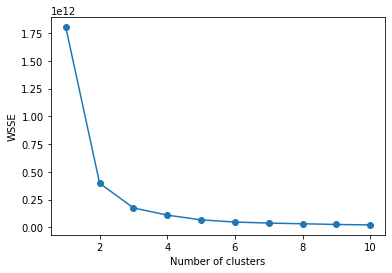

In [ ]:
wsse = [] 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 1703) 
    kmeans.fit(df_cluster_driverRisk_array)
    wsse.append(kmeans.inertia_) 
plt.plot(range(1, 11), wsse)
plt.scatter(range(1, 11),wsse)
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')
plt.show()

In [ ]:
df_fleet_cluster = df_final[['Age', 'Driving_Hours ', 'Number_of_trips',
       'Avg_Daily_Safety_score', 'Avg_Daily_Reward_Star', 'Total_Miles_done',
       'Number_of_tickets_received']]
colname=[]
for x in df_fleet_cluster.columns:
    if df_fleet_cluster[x].dtype=='object':
        colname.append(x)
colname 
le=LabelEncoder()
for x in colname:
    df_fleet_cluster[x]=le.fit_transform(df_fleet_cluster[x])
df_fleet_cluster_array = df_fleet_cluster.values[:,:]

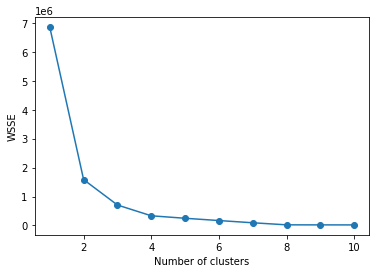

In [ ]:
wsse_fleet = [] 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 1703) 
    kmeans.fit(df_fleet_cluster_array)
    wsse_fleet.append(kmeans.inertia_) 
plt.plot(range(1, 11), wsse_fleet)
plt.scatter(range(1, 11),wsse_fleet)
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')
plt.show()

# KMeans - Number of clusters: 3 (df_upload)

In [ ]:
kmeans_driverRisk_Cluster_3 = KMeans(n_clusters = 3, random_state = 1703) 
Driver_risk_cluster3 = kmeans_driverRisk_Cluster_3.fit_predict(df_cluster_driverRisk_array)
df_cluster_driver_risk["Driver_risk_cluster_3"] = Driver_risk_cluster3

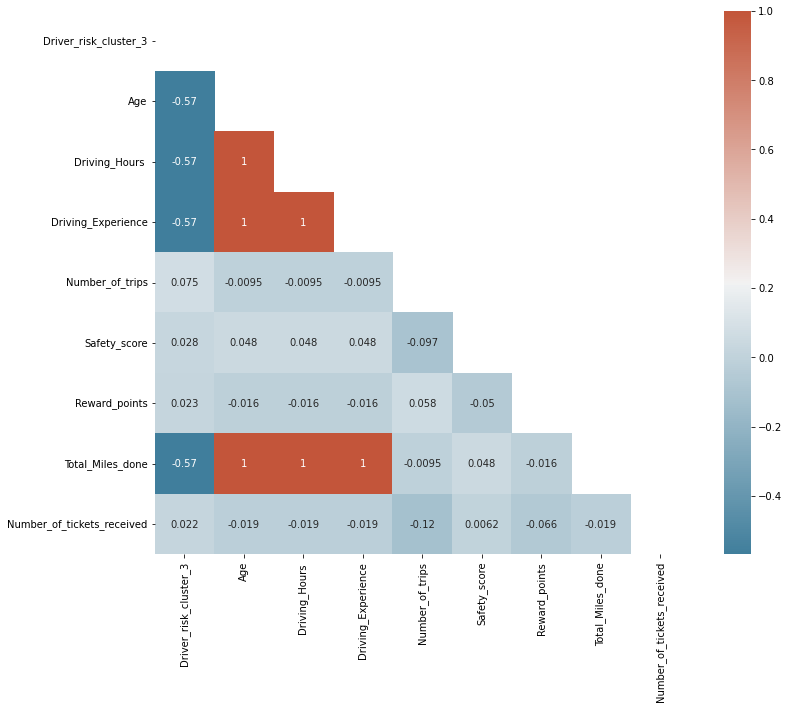

In [ ]:
df_cluster_3_correlation =  df_cluster_driver_risk[['Driver_risk_cluster_3','Age', 'Driving_Hours ', 'Driving_Experience','Number_of_trips', 'Safety_score',
       'Reward_points', 'Total_Miles_done', 'Number_of_tickets_received']]
corr_cluster3 = df_cluster_3_correlation.corr()
f, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_cluster3, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_cluster3, annot=True, mask = mask, cmap=cmap)


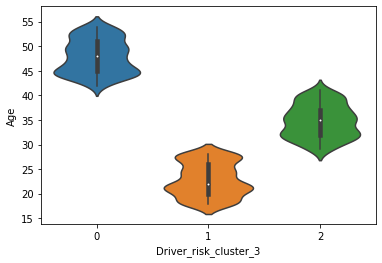

In [ ]:
sns.violinplot(data=df_cluster_driver_risk, y= 'Age', x= 'Driver_risk_cluster_3')

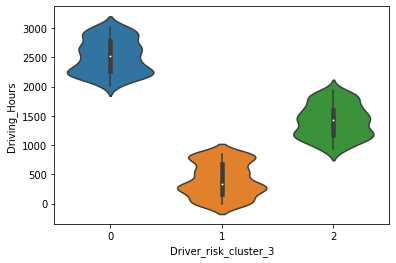

In [ ]:
sns.violinplot(data=df_cluster_driver_risk, y= 'Driving_Hours ', x= 'Driver_risk_cluster_3')

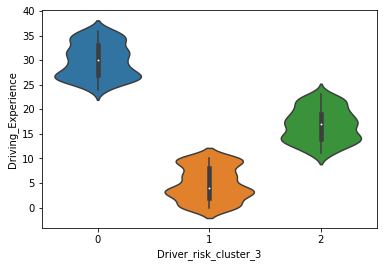

In [ ]:
sns.violinplot(data=df_cluster_driver_risk, y= 'Driving_Experience', x= 'Driver_risk_cluster_3')

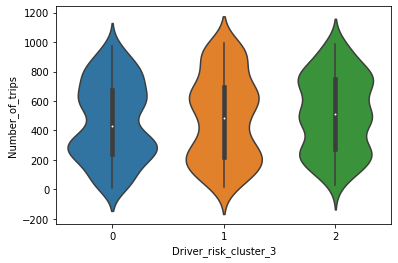

In [ ]:
sns.violinplot(data=df_cluster_driver_risk, y= 'Number_of_trips', x= 'Driver_risk_cluster_3')

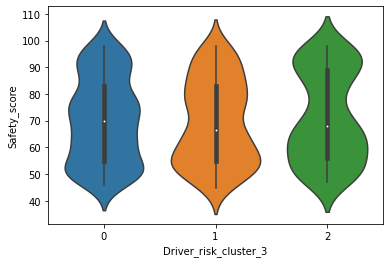

In [ ]:
sns.violinplot(data=df_cluster_driver_risk, y= 'Safety_score', x= 'Driver_risk_cluster_3')

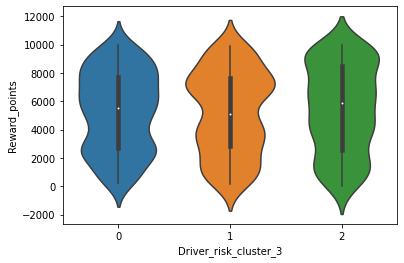

In [ ]:
sns.violinplot(data=df_cluster_driver_risk, y= 'Reward_points', x= 'Driver_risk_cluster_3')

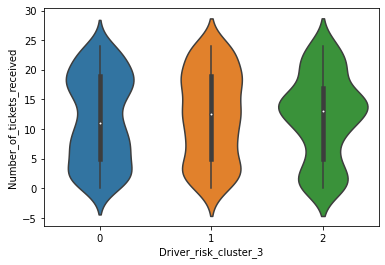

In [ ]:
sns.violinplot(data=df_cluster_driver_risk, y= 'Number_of_tickets_received', x= 'Driver_risk_cluster_3')

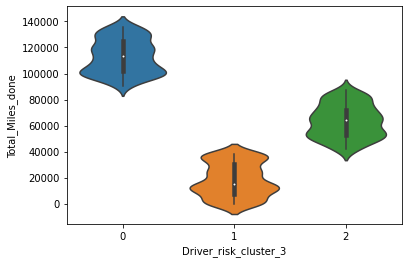

In [ ]:
sns.violinplot(data=df_cluster_driver_risk, y= 'Total_Miles_done', x= 'Driver_risk_cluster_3')

# KMeans - Number of clusters: 4 (df_upload)

In [ ]:
kmeans_driverRisk_Cluster_4 = KMeans(n_clusters = 4, random_state = 1703) 
Driver_risk_cluster4 = kmeans_driverRisk_Cluster_4.fit_predict(df_cluster_driverRisk_array)
df_cluster_driver_risk["Driver_risk_cluster_4"] = Driver_risk_cluster4

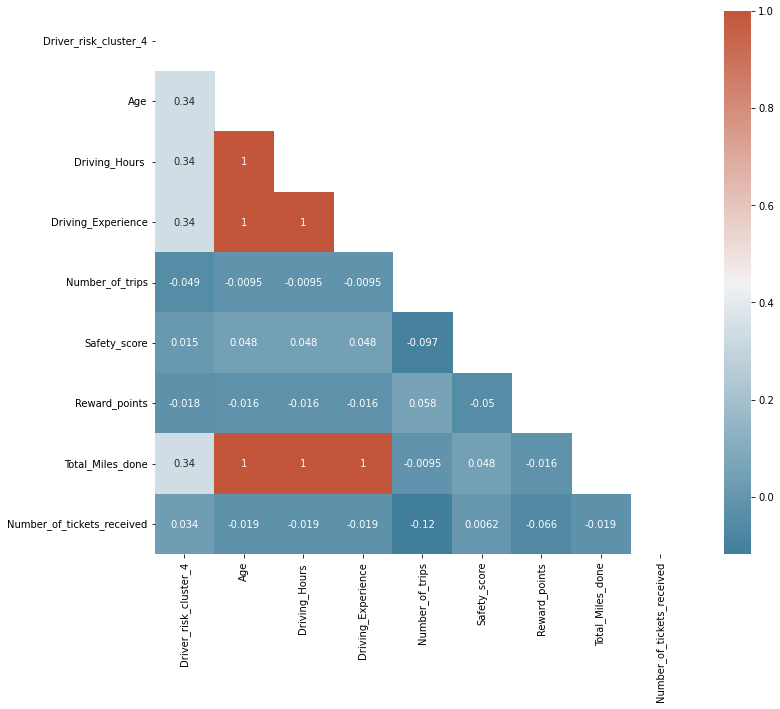

In [ ]:
df_cluster_4_correlation =  df_cluster_driver_risk[['Driver_risk_cluster_4','Age', 'Driving_Hours ', 'Driving_Experience','Number_of_trips', 'Safety_score',
       'Reward_points', 'Total_Miles_done', 'Number_of_tickets_received']]
corr_cluster4 = df_cluster_4_correlation.corr()
f, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_cluster4, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_cluster4, annot=True, mask = mask, cmap=cmap)

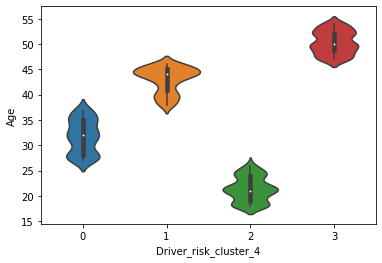

In [ ]:
sns.violinplot(data=df_cluster_driver_risk, y= 'Age', x= 'Driver_risk_cluster_4')

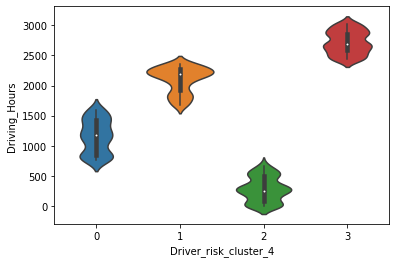

In [ ]:
sns.violinplot(data=df_cluster_driver_risk, y= 'Driving_Hours ', x= 'Driver_risk_cluster_4')

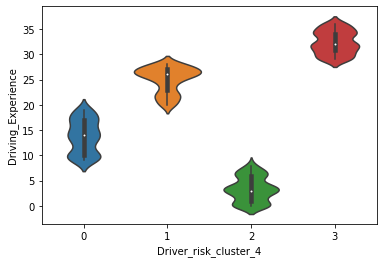

In [ ]:
sns.violinplot(data=df_cluster_driver_risk, y= 'Driving_Experience', x= 'Driver_risk_cluster_4')

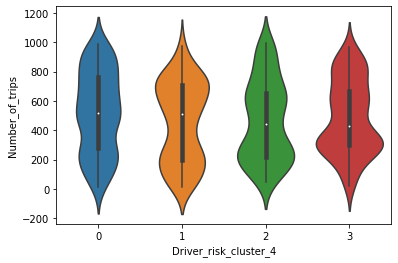

In [ ]:
sns.violinplot(data=df_cluster_driver_risk, y= 'Number_of_trips', x= 'Driver_risk_cluster_4')

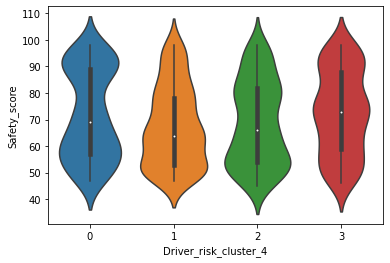

In [ ]:
sns.violinplot(data=df_cluster_driver_risk, y= 'Safety_score', x= 'Driver_risk_cluster_4')

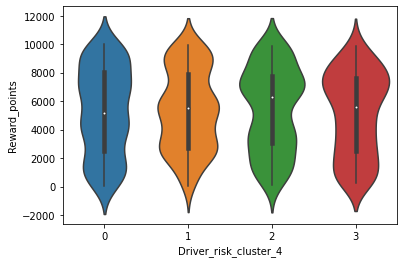

In [ ]:
sns.violinplot(data=df_cluster_driver_risk, y= 'Reward_points', x= 'Driver_risk_cluster_4')

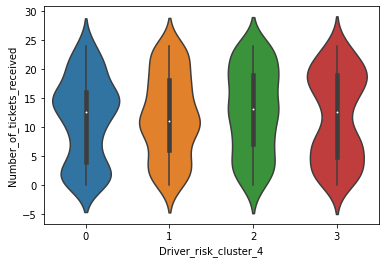

In [ ]:
sns.violinplot(data=df_cluster_driver_risk, y= 'Number_of_tickets_received', x= 'Driver_risk_cluster_4')

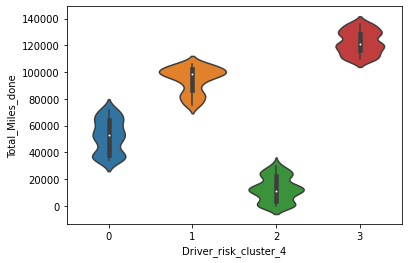

In [ ]:
sns.violinplot(data=df_cluster_driver_risk, y= 'Total_Miles_done', x= 'Driver_risk_cluster_4')

In [ ]:
df_upload["Driver_Risk"] = Driver_risk_cluster4
df_upload["Driver_Risk"] = df_upload.Driver_Risk.map({0:"Low",1:"High",2:"VeryLow",3:"VeryHigh",})

# KMeans - Number of clusters: 4 (df_final)

In [ ]:
kmeans_fleet_driverRisk_Cluster_4 = KMeans(n_clusters = 4, random_state = 1703) 
Driver_fleet_risk_cluster4 = kmeans_fleet_driverRisk_Cluster_4.fit_predict(df_fleet_cluster_array)
df_fleet_cluster["Driver_risk_cluster_4"] = Driver_fleet_risk_cluster4

<ipython-input-48-2a1933c5309b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fleet_cluster["Driver_risk_cluster_4"] = Driver_fleet_risk_cluster4


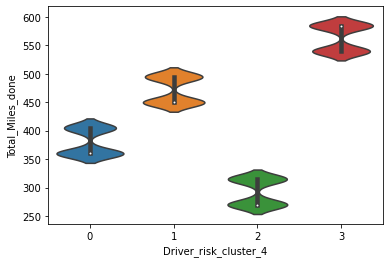

In [ ]:
sns.violinplot(data=df_fleet_cluster, y= 'Total_Miles_done', x= 'Driver_risk_cluster_4')

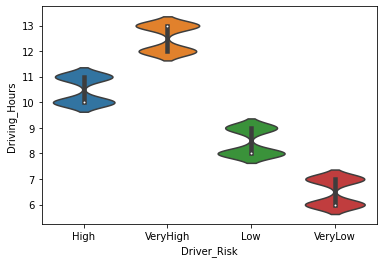

In [ ]:
df_final["Driver_Risk"] = Driver_fleet_risk_cluster4
df_final["Driver_Risk"] = df_final.Driver_Risk.map({0:"Low",1:"High",2:"VeryLow",3:"VeryHigh",})
df_final.head()
sns.violinplot(data=df_final,y= '', x= 'Driver_Risk')

In [ ]:
#df_final.to_excel(r"Fleet_Dataset_v1.xlsx",index = True)